## Load Libraries

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
penguins = load_penguins() 



## Question 4: how do we concisely describe the penguin dataset?
(Or, dimension reduction with Principle Component Analysis)

For this we go back to the origianl metrics including all lengths and body mass. We have 4 dimensions we measured the penguins on, and their relationship with each other is a little complex. Many of the metrics are correlated with each other, indicating redudancy between them. What if we want a more concise way of describing the data? We can try to reduce the dimensions to fewer that are orthogonal to each other, along the first of which the data has the most variance. 


Read more about PCA [here](http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/)

In [ ]:
from sklearn.decomposition  import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

penguins_dropna = penguins.dropna()
X = penguins_dropna[["bill_length_mm",	"bill_depth_mm",	"flipper_length_mm", "body_mass_g"]] 
Y = penguins_dropna["species"] 
scaler = StandardScaler() # Create a StandardScaler object.
scaler.fit(X) # Fit the StandardScaler object to the data.
X_scaled = scaler.transform(X) # Generating a matrix with standardized values (z-scores). Z-scores allow us to compare all the metrics on the same scale.


First we generate all the principle components we can, in this case it is 4, and we check the explanatory power of including more and more of them.

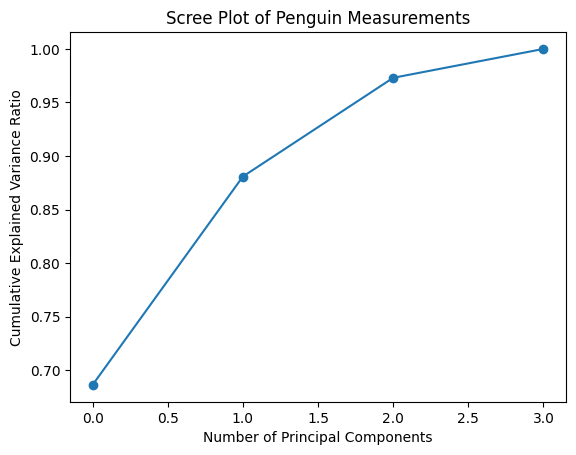

In [8]:
pca4 = PCA(n_components=4)
pca4.fit(X_scaled)
f = plt.plot(pca4.explained_variance_ratio_.cumsum(), "o-")
plt.xlabel("Number of Principal Components");
plt.ylabel("Cumulative Explained Variance Ratio");
plt.title("Scree Plot of Penguin Measurements");

We see that 2 components explain vast majority of the variance. So we are going to plot our original data into the `PC1` v `PC2` space. Now let's project the data into this new, more concise space. 

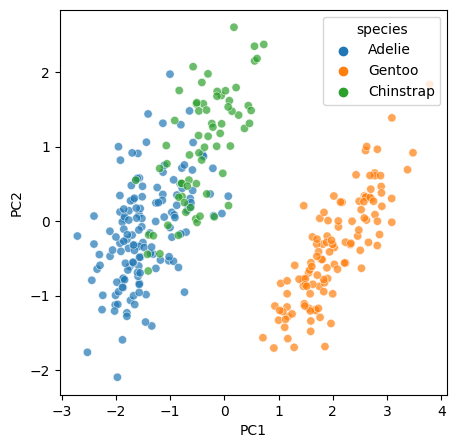

In [9]:

pca2 = PCA(n_components=2)
pca2.fit(X_scaled)
PCs = pca2.fit_transform(X_scaled)
X_scaled_df = pd.DataFrame(X_scaled, columns = ["bill_length_mm",	"'bill_depth_mm",	"flipper_length_mm", "body_mass_g"])
PCs_df = pd.DataFrame(PCs, columns = ["PC1", "PC2"])
penguins_pca = pd.concat([X_scaled_df, Y, PCs_df], axis = 1)

f, ax = plt.subplots(1, figsize = (5, 5))
sns.scatterplot(x=PCs[:, 0], y=PCs[:, 1], hue=Y, alpha = 0.7)
ax.set_xlabel("PC1");
ax.set_ylabel("PC2");

Mathematically, `PC1` and `PC2` are linear combinations of the original metrics. We also want to know how much of each of the original metrics contribute to each of the `PC`s. We calculate a loading matrix for this puropse. 

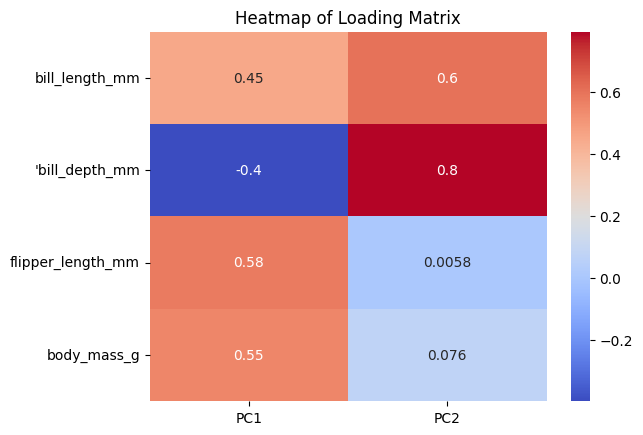

In [ ]:
loading_matrix = pd.DataFrame(pca2.components_.T, columns = ["PC1", "PC2"], index = ["bill_length_mm",	"'bill_depth_mm",	"flipper_length_mm", "body_mass_g"])

f = sns.heatmap(loading_matrix, cmap="coolwarm", annot=True)
plt.title("Heatmap of Loading Matrix")
plt.show()


We can see that `PC1` is mostly coming from `filpper length` and `body mass`, and `PC2` is mostly coming from `bill depth`.